# HOJA DE TRABAJO 2 CLUSTERING

Raul Jimenez 19017

Oscar Saravia 19322

Donaldo Garcial 19683

In [2]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
import random
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import pyclustertend
import sklearn.mixture as mixture
from sklearn import datasets

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
movies = pd.read_csv('./movies.csv', encoding ='latin1')

## Preprocesamiento
1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la 
generación de grupos y por qué. Describa con qué variables calculará los grupos.

**Logramos concluir que las variables que no aportan informacion para la generacion de grupos son todas aquellas cuantitativas debido a que no nos permiten optener datos cuantitativos. Las variables como castWomenAmount, castMenAmount debido a que solamente nos dicen la cantidad de mujeres y/o hombre que hubieron en la pelicula lo cual no aporta mayor valor a los datos. Al igual que la variable de productionCoAmount debido a que solamente nos dice la cantidad de compañias que participaron en la producion lo cual no tiene tanto valor para obtener un analicis estadistico al igual que ProductionCompanyCountry debido a que solo nos dice paises en los que se llevo acabo la producion. La variable de id tampoco sera de utilidad debidoa a que es solamente un identificador secuencial. Al igual que release date no nos brinda informacion relevante para saber si fue un exito o no.**

**Las variables que nos ayudaran a calcular los grupos son las demas variables cuantitativas debidos a que son las que mas informacion brinand sobre que tan importatne fue la pelicula tanto para las personas que la vieron como para los que la producieron. Con esos datos se pueden armar grupos e identificar correlaciones entre variables.** 

In [4]:
usefullAttr = ['popularity', 'budget', 'revenue', 'genresAmount', 'productionCountriesAmount', 'voteCount', 'voteAvg', 'actorsAmount']

In [5]:
datos = movies[usefullAttr]
datos

,popularity,budget,revenue,genresAmount,productionCountriesAmount,voteCount,voteAvg,actorsAmount
0,20.880,4000000,4257354.0,2,1,2077,5.7,25
1,9.596,21000000,12136938.0,3,2,223,6.5,15
2,100.003,11000000,775398007.0,3,1,16598,8.2,105
3,134.435,94000000,940335536.0,2,1,15928,7.8,24
4,58.751,55000000,677387716.0,3,1,22045,8.5,76
...,...,...,...,...,...,...,...,...
9995,16.662,0,0.0,2,1,108,6.8,10
9996,491.706,0,0.0,1,1,2,1.5,8
9997,565.658,0,0.0,1,17,30,6.1,1
9998,9.664,0,0.0,1,0,1,6.0,0


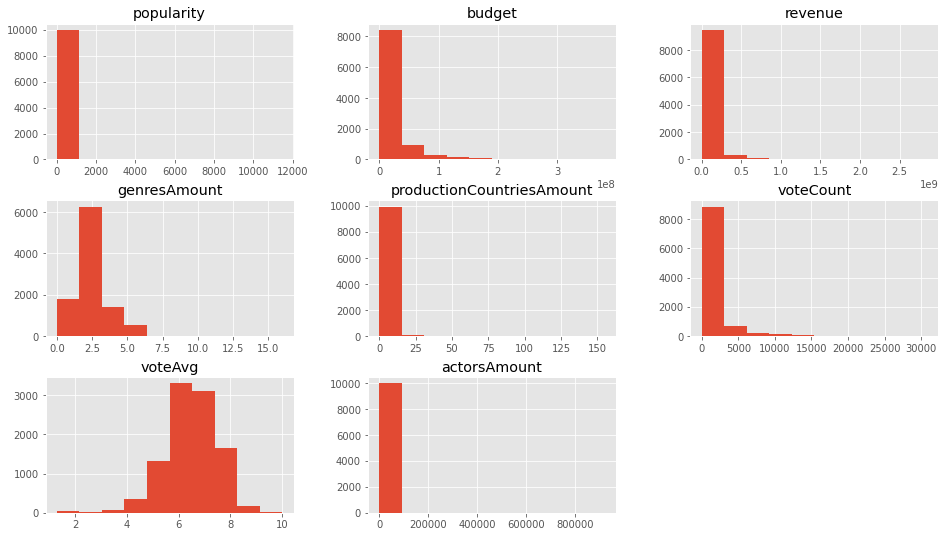

In [5]:
datos.hist()
plt.show()

## Tendencia al agrupamiento
2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment 
of cluster Tendency). Discuta sus resultados e impresiones. 

In [35]:
ejeX = []
normalized_data = movies[usefullAttr].copy()
for column in normalized_data.columns:
  column
  normalized_data[column] = (normalized_data[column]-normalized_data[column].mean())/normalized_data[column].std()
  ejeX.append(normalized_data[column])
  # try:
  #   normalized_data[column] = (normalized_data[column] - normalized_data.mean()) / normalized_data.std()
  #   ejeX.append(normalized_data[column])
  # except:
  #   continue
ejeX

[0      -0.140793
 1      -0.192857
 2       0.224285
 3       0.383155
 4       0.033946
           ...   
 9995   -0.160255
 9996    2.031620
 9997    2.372838
 9998   -0.192544
 9999    0.149279
 Name: popularity, Length: 10000, dtype: float64,
 0      -0.397296
 1       0.066847
 2      -0.206178
 3       2.059929
 4       0.995131
           ...   
 9995   -0.506506
 9996   -0.506506
 9997   -0.506506
 9998   -0.506506
 9999   -0.499569
 Name: budget, Length: 10000, dtype: float64,
 0      -0.350840
 1      -0.298164
 2       4.804346
 3       5.906977
 4       4.149133
           ...   
 9995   -0.379301
 9996   -0.379301
 9997   -0.379301
 9998   -0.379301
 9999   -0.377603
 Name: revenue, Length: 10000, dtype: float64,
 0      -0.516645
 1       0.349482
 2       0.349482
 3      -0.516645
 4       0.349482
           ...   
 9995   -0.516645
 9996   -1.382771
 9997   -1.382771
 9998   -1.382771
 9999    0.349482
 Name: genresAmount, Length: 10000, dtype: float64,
 0      -0.24

In [37]:
# preprosesamiento datos normalizdos
normalize_x = sklearn.preprocessing.scale(ejeX)
pyclustertend.hopkins(datos,len(datos))

0.011455581151746658

In [8]:
random.seed(150)
X_scale=sklearn.preprocessing.scale(datos)
# X = X_scale
pyclustertend.hopkins(datos,len(datos))

0.01163003173951953

 Como se puede observar el estadístico de hopkings no es igual a 0.5 por lo que se dice que es factible hacer agrupamiento.

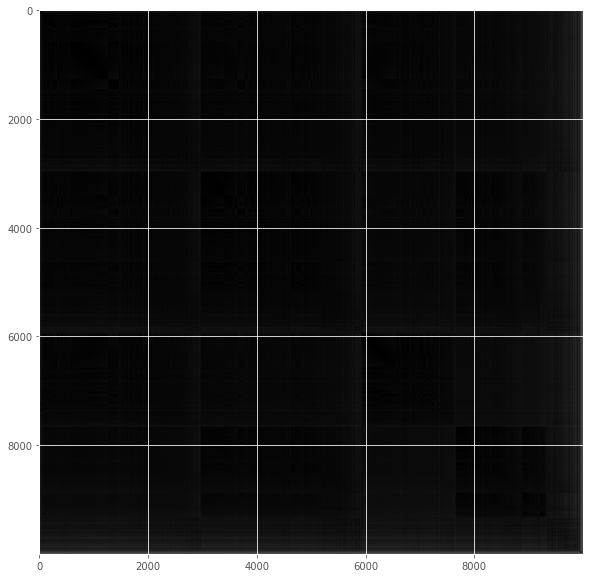

In [9]:
pyclustertend.vat(X_scale)

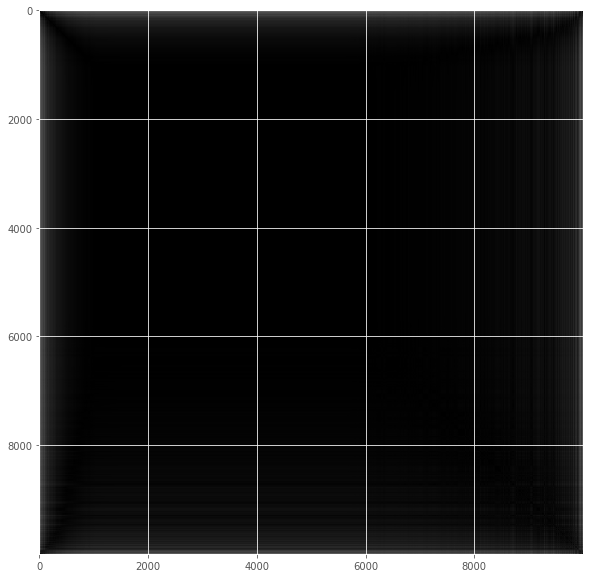

In [6]:
pyclustertend.vat(np.array(datos))

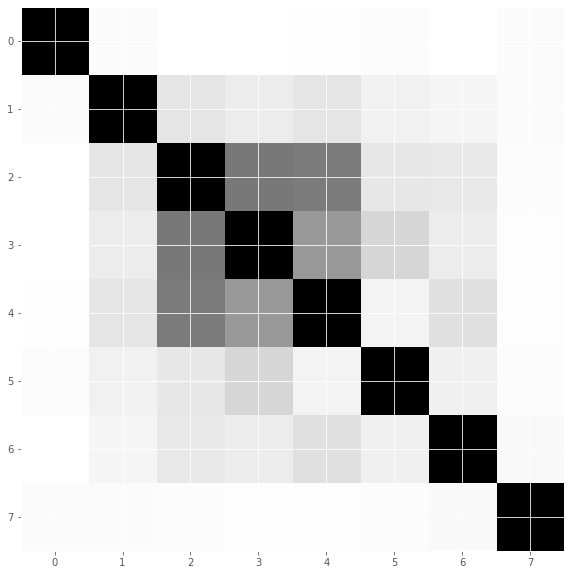

In [39]:
pyclustertend.vat(ejeX)

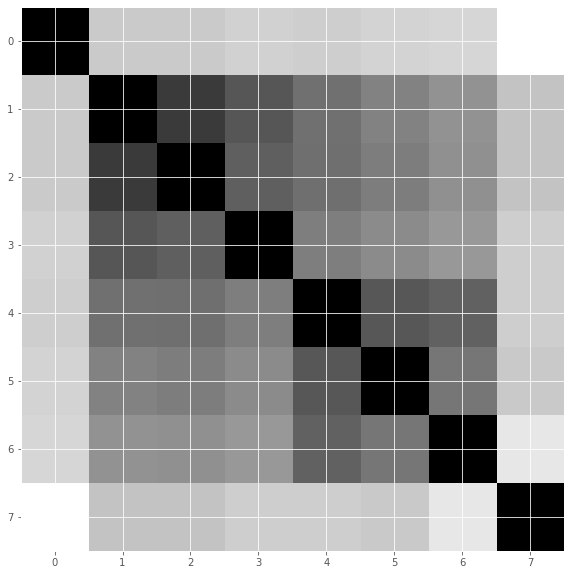

In [38]:
pyclustertend.vat(normalize_x)

## Numero de grupos
3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. 
Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que 
trabajará. 

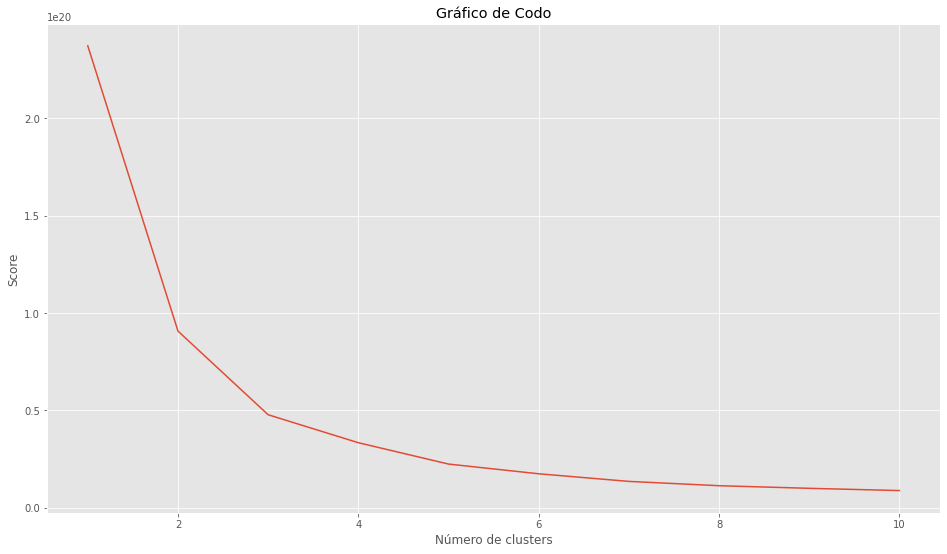

In [7]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(datos)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

 K = 3 es un buen número para los grupos debido a que es donde se forma el codo